# **Project Name**    -  Sales Prediction using Python




# **Problem Statement**


Accurately forecasting sales is crucial for effective business planning and inventory management. This project aims to develop a predictive model using Python that analyzes historical sales data to forecast future sales. By leveraging machine learning techniques, the model will help businesses make data-driven decisions, optimize stock levels, and improve overall profitability.


## ***1. Dataset Overview***

In [79]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
import xgboost as xgb
# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Library used for ML Model implementation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor


# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# Load Dataset
df = pd.read_csv("../Rutuja/Downloads/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
# Dataset Rows & Columns count
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  5


In [10]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values

In [16]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## ***2. Understanding The Variables***

In [19]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


## ***3. Data Vizualization***

#### Chart - 1 : Checking for outliers 

<Axes: ylabel='Sales'>

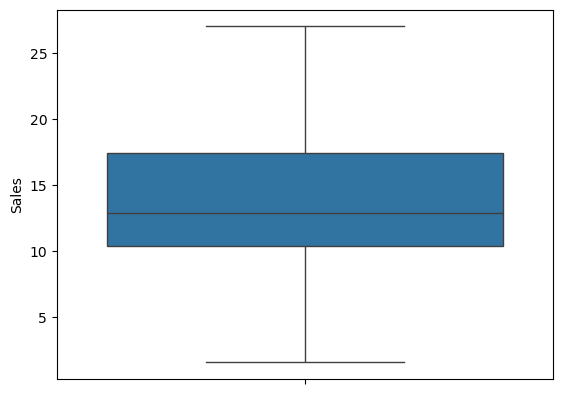

In [32]:
sns.boxplot(y=df['Sales'])

#### Chart - 2 : Distribution Of Numerical Features

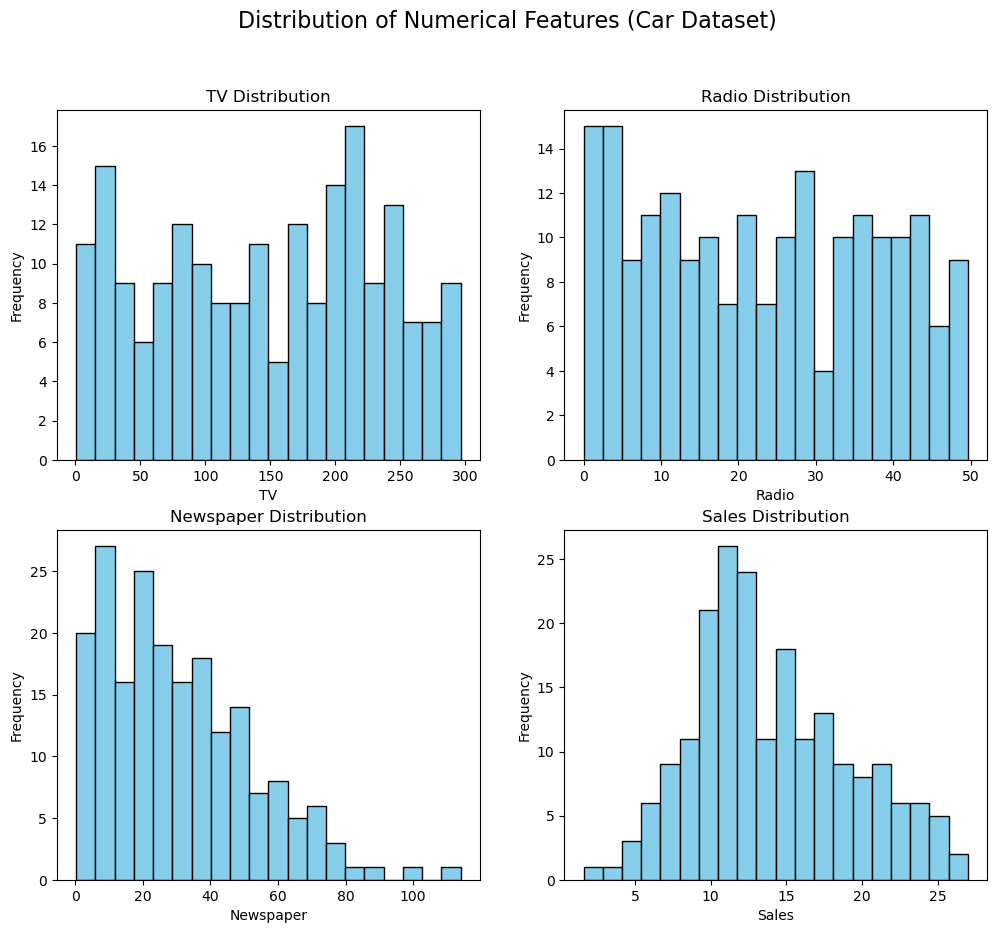

In [44]:
import matplotlib.pyplot as plt

# List of numerical columns you want to plot
numerical_columns = ['TV', 'Radio', 'Newspaper', 'Sales']

# Set up the plot grid
plt.figure(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features (Car Dataset)', fontsize=16)

# Plot each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()


#### Chart - 3 : Correlation Heatmap

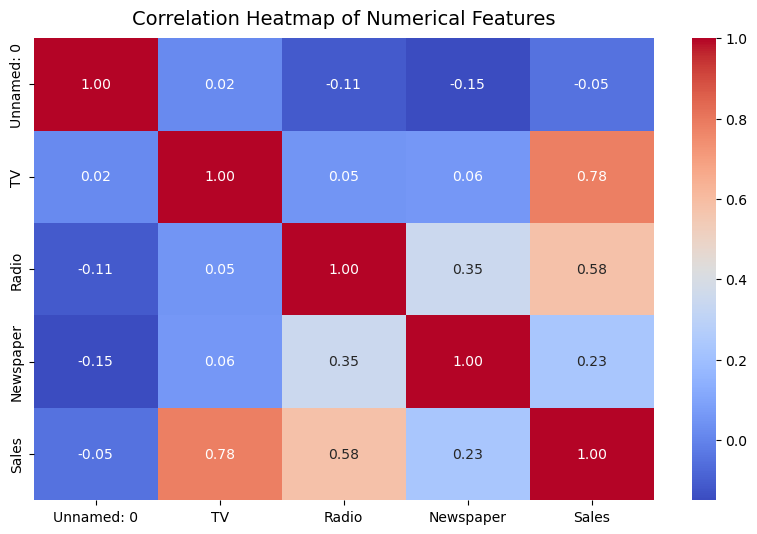

In [47]:
# Select only numerical columns 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Title and layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=10)

# Show plot
plt.show()


## ***5. Feature Engineering & Data Pre-processing***

### 1. Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all object-type (string) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])



In [53]:
# Defining the X and y
x=df.drop(columns=['Sales'], axis=1)
y=df['Sales']

### 2. Data Splitting

In [56]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [58]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Sales
9.7     5
12.9    3
11.6    3
11.9    3
13.4    3
       ..
14.9    1
15.6    1
5.5     1
27.0    1
23.8    1
Name: count, Length: 108, dtype: int64

## ***6. ML Model Implementation***

### ML Model - 1 : Linear regression

In [62]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = model1.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 1.1940411593185167
Mean Squared Error: 2.7554857349194224
Root Mean Squared Error: 1.6599655824502575
R² Score: 0.8995151417327237


### ML Model - 2 : Decision Tree

In [67]:
# ML Model - 2 Implementation (Correct for regression)
model2 = DecisionTreeRegressor(random_state=20)
model2.fit(x_train, y_train)

DecisionTreeRegressor(random_state=20)

In [69]:
y_pred = model2.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 1.1999999999999997
Mean Squared Error: 2.656499999999999
Root Mean Squared Error: 1.629877295995008
R² Score: 0.9031248746439889


### ML Model - 3 : Random Forest

In [72]:
model3= RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
y_pred = model3.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.7103999999999973
Mean Squared Error: 0.7677792499999991
Root Mean Squared Error: 0.8762301352955165
R² Score: 0.9720012380615494


### ML Model - 4 : SVM (Support Vector Machine)

In [81]:
# ML Model - 4 Implementation

# 1. Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# 2. Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 3. Train SVR
from sklearn.svm import SVR
model4 = SVR(kernel='rbf', C=100, epsilon=0.1)
model4.fit(x_train, y_train)

SVR(C=100)

In [83]:
y_pred_scaled = model4.predict(x_test)

# 5. Inverse transform and evaluate
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test_orig, y_pred))


Mean Absolute Error: 13.576144829787788
Mean Squared Error: 204.6924274400056
Root Mean Squared Error: 14.30707613176101
R² Score: 0.9729956215568893


### ML Model - 5 : Xtreme Gradient Boosting

In [86]:
# Train the XGBoost classifier
model5 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model5.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [87]:
y_pred = model5.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.13483391356671734
Mean Squared Error: 0.02955191635143556
Root Mean Squared Error: 0.1719067082793326
R² Score: 0.9746405418864441


## ***Selection of best model***

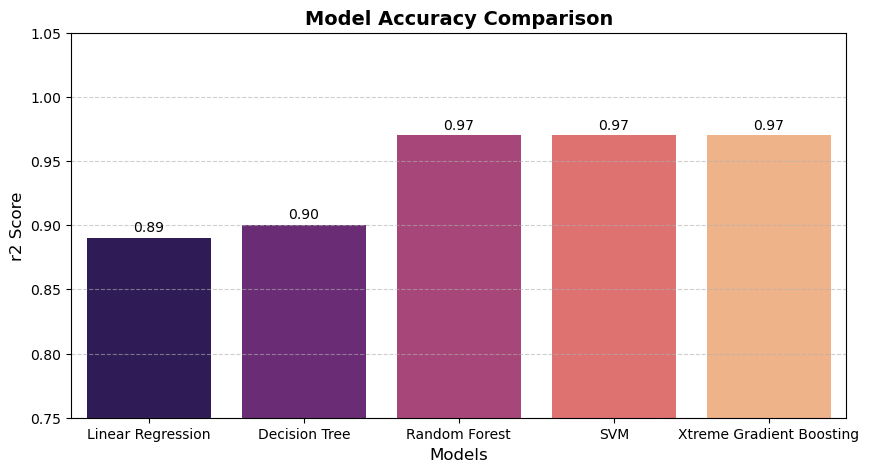

In [93]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Xtreme Gradient Boosting']
accuracy_scores = [0.89,0.90, 0.97, 0.97 ,0.97]
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="magma")
plt.xlabel("Models", fontsize=12)
plt.ylabel("r2 Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=10)
plt.ylim(0.75, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Checking for Underfitting and Overfitting

In [104]:
from sklearn.metrics import r2_score

# For each model
train_r2 = r2_score(y_train, model5.predict(x_train))
test_r2 = r2_score(y_test, model5.predict(x_test))

print("Train R²:", train_r2)
print("Test R²:", test_r2)


Train R²: 0.9998440939361996
Test R²: 0.9746405418864441


# **Conclusion**

In this Car Price Prediction project, the primary objective was to accurately estimate the resale value of used cars based on a combination of key features including year of manufacture, present price, fuel type, transmission type, and ownership history. After a detailed workflow involving data exploration, preprocessing, model selection, and evaluation, the XGBoost Regressor emerged as the most effective model due to its high predictive accuracy and robustness.